## Getting Started with Jarjarquant
---

This notebook demonstrates how to use the Jarjarquant library for quantitative trading analysis. Jarjarquant provides tools for accessing market data, calculating technical indicators, and analyzing trading strategies.

### Setup
First, we'll import the Jarjarquant library and set up our environment. We're using `nest_asyncio` to allow running async code in the notebook.

In [1]:
# Import Jarjarquant and nest_asyncio for running async code in notebook
from jarjarquant import Jarjarquant
import nest_asyncio
nest_asyncio.apply()  # Apply nest_asyncio to allow running async code in Jupyter

# Initialize Jarjarquant with TWS (Interactive Brokers Trader Workstation) as data source
jjq = Jarjarquant(data_source='tws')

### Examining the Data
Let's look at the initial data frame to see what market data we have available.

In [2]:
# Display the first few rows of the dataframe to see available market data
jjq.df.head()

,date,Open,High,Low,Close,Volume,average,barCount
0,1994-12-02,25.06,25.16,24.87,24.87,396038.305129,24.873849,1
1,1994-12-05,24.87,24.87,24.20,24.20,781057.326512,24.203025,1
2,1994-12-06,24.30,24.58,24.01,24.58,476584.022039,24.584175,1
3,1994-12-07,24.39,24.68,24.20,24.68,674012.855831,24.679462,1
4,1994-12-08,24.77,25.35,24.49,24.49,578381.214745,24.492699,1


### Available Indicators
Jarjarquant provides various technical indicators. Let's explore the RSI (Relative Strength Index) indicator options.

In [3]:
# List available indicators and show detailed information about RSI
import json
json.loads(jjq.list_indicators())['RSI']  # Extract RSI information from available indicators

[{'name': 'period', 'type': 'int', 'default': 14},
 {'name': 'transform', 'type': '_empty', 'default': None}]

In [4]:
# Add RSI indicator with a 9-period lookback
jjq.add_indicator(Jarjarquant.rsi, 'RSI', period=9)

In [5]:
# Display the updated dataframe with the RSI indicator
jjq.df.tail()

,date,Open,High,Low,Close,Volume,average,barCount,RSI
247,1995-11-24,25.25,25.35,25.16,25.25,1.693559e+05,25.251188,1,0.695483
248,1995-11-27,25.25,25.45,25.16,25.25,1.027811e+06,25.251188,1,0.695483
249,1995-11-28,25.35,25.83,25.16,25.83,7.790896e+05,25.822913,1,1.596261
250,1995-11-29,25.83,25.92,25.45,25.64,6.417421e+05,25.632337,1,1.123975
251,1995-11-30,25.54,25.54,25.25,25.45,3.717696e+05,25.441762,1,0.667467


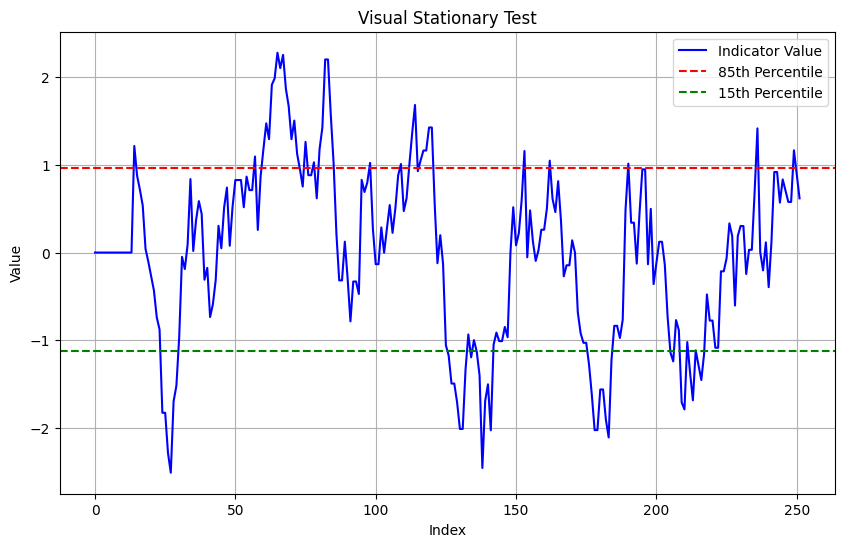

STATIONARY @ 5% CONFIDENCE LEVEL
WEAK EVIDENCE OF STATIONARITY
----------------------------------------
NORMAL @ 5% CONFIDENCE LEVEL
----------------------------------------
Relative Entropy: 0.8965318182020307
EXCELLENT
----------------------------------------
3.227890640570787
PASSABLE DISTRIBUTION - SOME OUTLIERS - INSPECT VISUALLY
----------------------------------------
NMI @ lag 1 = 0.3783669431806176
NMI @ lag 2 = 0.28373821310175334
NMI @ lag 3 = 0.24053714352012812
NMI @ lag 4 = 0.2169213374287684
NMI @ lag 5 = 0.20852478241881775
NMI @ lag 6 = 0.20050220615123854
NMI @ lag 7 = 0.15928585044890253
NMI @ lag 8 = 0.11382220017244
NMI @ lag 9 = 0.11915090784454296
NMI @ lag 10 = 0.13009422462940348


In [6]:
jjq.rsi(jjq.df).indicator_evaluation_report()

In [7]:
jjq.feature_evaluator.parallel_indicator_distribution_study(jjq.rsi)

{'ADF Test': np.float64(0.5),
 'Jarque-Bera Test': np.float64(0.5),
 'Relative Entropy': np.float64(0.88),
 'Range-IQR Ratio': np.float64(3.67)}